In [93]:
# On essaye de réutiliser le code ~/openfisca_france_indirect_taxation/examples/benjello_candidates_to_removal/master_thesis/loosers_within_income_deciles.py
import numpy
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from openfisca_survey_manager.utils import asof

from openfisca_france_indirect_taxation import FranceIndirectTaxationTaxBenefitSystem
from openfisca_france_indirect_taxation.examples.utils_example import (
    wavg,
    collapse,
    dataframe_by_group,
    graph_builder_bar)
from openfisca_france_indirect_taxation.surveys import SurveyScenario
from openfisca_france_indirect_taxation.projects.budgets.reforme_energie_budgets_2018_2019 import officielle_2019_in_2017
from openfisca_france_indirect_taxation.calibration import get_inflators_by_year_energy


In [2]:
ident_men = pd.DataFrame(pd.HDFStore("C:/Users/veve1/OneDrive/Documents/ENSAE 3A/Memoire MiE/Data/data_collections/output/openfisca_indirect_taxation_data_2017.h5")['input']['ident_men'])
ident_men['ident_men'] = ident_men.ident_men.astype(numpy.int64)

data_path = "C:/Users/veve1/OneDrive/Documents/ENSAE 3A/Memoire MiE/Data"
path = "C:/Users/veve1/OneDrive/Documents/ENSAE 3A/Memoire MiE/Data/donnees_simulations"
elasticite = True
replique_gouv = True

In [3]:
df_elasticities = pd.read_csv(os.path.join(data_path,'Elasticities_literature.csv'), sep = ";")
df_elasticities = df_elasticities.astype({'ref_elasticity': str, 'elas_price_1_1': float , 'elas_price_2_2' : float ,'elas_price_3_3' : float })

# exemple
elasticites = df_elasticities[df_elasticities['ref_elasticity'] == 'Douenne (2020)'] 

In [4]:
from openfisca_france_indirect_taxation.projects.Master_Thesis_Herve.Simulation_taxe_energie_winners_losers import (
    simulate_reformes_energie,
    run_all_elasticities
    )
from openfisca_france_indirect_taxation.projects.Master_Thesis_Herve.Reform_carbon_tax import carbon_tax_rv

In [5]:
to_graph, menages_reform = run_all_elasticities(df_elasticities, year = 2019, reform = carbon_tax_rv)

c:\Users\veve1\OneDrive\Documents\ENSAE 3A\Memoire MiE\hervenv\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
menages_reform

,cheques_energie,rev_disp_loyerimput,niveau_vie_decile,ticpe_totale_carbon_tax_rv,ocde10,pondmen,ref_elasticity,ticpe_totale,Net_apres_cheques_energie,is_losers
0,0.0,40835.156250,7.0,1151.166504,1.5,1443,Combet et al (2009),1119.595947,-31.570557,True
1,194.0,19984.138672,3.0,659.874023,1.0,2407,Combet et al (2009),641.777039,175.903015,False
2,76.0,36810.750000,2.0,443.254913,2.6,968,Combet et al (2009),431.098755,63.843842,False
3,0.0,37777.656250,3.0,352.876282,1.5,2076,Combet et al (2009),342.695557,-10.180725,True
4,0.0,44344.488281,6.0,1060.471558,2.0,1364,Combet et al (2009),1031.388306,-29.083252,True
...,...,...,...,...,...,...,...,...,...,...
12076,0.0,60359.238281,7.0,974.980835,2.1,3702,Douenne (2020),924.932861,-50.047974,True
12077,0.0,47996.156250,7.0,0.000000,1.5,1743,Douenne (2020),0.000000,0.000000,False
12078,0.0,52158.027344,8.0,0.000000,1.5,1571,Douenne (2020),0.000000,0.000000,False
12079,48.0,14073.252930,2.0,0.000000,1.0,1087,Douenne (2020),0.000000,48.000000,False


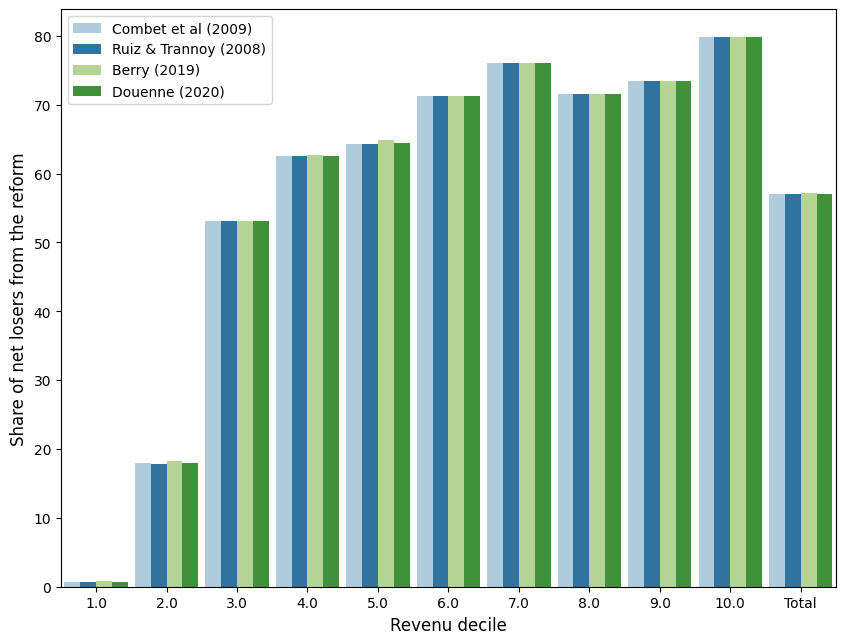

In [6]:
plt.figure(figsize= (10,7.5)) 
# Si on veut avoir la part de gagnants qui complète la bar jusqu'à 1 
#to_graph['total'] = 1
#bar1 = sns.barplot(x="niveau_vie_decile", y = 'total', data = to_graph, hue = 'ref_elasticity', palette = sns.color_palette("muted"), saturation = .2, width=.9)
bar2 = sns.barplot(x="niveau_vie_decile", y = 'losers', data = to_graph, hue = 'ref_elasticity', palette = sns.color_palette("Paired"), width = .9)
plt.xlabel('Revenue decile', fontdict = {'fontsize' : 12})
plt.ylabel('Share of net losers from the reform', fontdict = {'fontsize' : 12})
plt.legend()
plt.savefig(os.path.join(path,'Winners_losers_reform_carbon_tax_rv_2019.png'))

In [80]:
menages_reform_95_perc = menages_reform.groupby(['ref_elasticity','niveau_vie_decile'])['taux_effort'].quantile(0.95)
menages_reform_95_perc = menages_reform_95_perc.reset_index()
menages_reform_95_perc.rename(columns = {'taux_effort' : 'taux_effort_95'},inplace = True)
menages_reform = menages_reform.merge(right = menages_reform_95_perc, how = 'inner', on = ['ref_elasticity','niveau_vie_decile'])
menages_reform_only_95 = menages_reform[menages_reform['taux_effort'] <= menages_reform['taux_effort_95']]

In [83]:
menages_reform_only_95 = menages_reform[menages_reform['taux_effort'] <= menages_reform['taux_effort_95']]

<Axes: xlabel='niveau_vie_decile', ylabel='Net_apres_cheques_energie'>

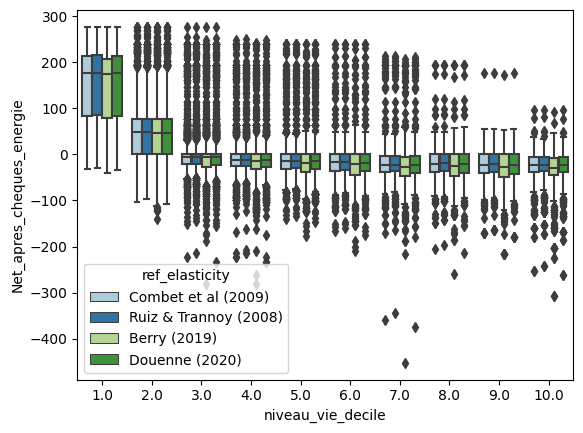

In [84]:
sns.boxplot(data = menages_reform, x = "niveau_vie_decile", y = "Net_apres_cheques_energie", hue = "ref_elasticity", palette = sns.color_palette("Paired"))

<Axes: xlabel='niveau_vie_decile', ylabel='taux_effort'>

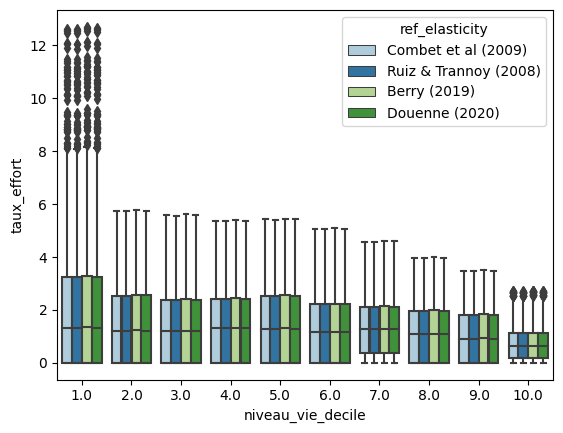

In [86]:
sns.boxplot(data = menages_reform_only_95, x = "niveau_vie_decile", y = "taux_effort", hue = "ref_elasticity", palette = sns.color_palette("Paired"))

In [87]:
menages_reform_only_95.sort_values(by = 'taux_effort', ascending = False).head(44)

,cheques_energie,rev_disp_loyerimput,niveau_vie_decile,ticpe_totale_carbon_tax_rv,ocde10,pondmen,ref_elasticity,ticpe_totale,Net_apres_cheques_energie,is_losers,taux_effort,taux_effort_95
29285,194.0,9710.945312,1.0,1234.003418,1.0,2588,Berry (2019),1192.920776,152.917358,False,12.707347,12.792172
29549,240.0,7371.335938,1.0,934.272461,1.5,772,Berry (2019),903.168640,208.896179,False,12.674398,12.792172
41366,194.0,9710.945312,1.0,1227.759521,1.0,2588,Douenne (2020),1192.920776,159.161255,False,12.643048,12.727446
29845,194.0,2961.366455,1.0,374.158112,1.0,3649,Berry (2019),361.701599,181.543488,False,12.634644,12.792172
5123,194.0,9710.945312,1.0,1226.558960,1.0,2588,Combet et al (2009),1192.920776,160.361816,False,12.630686,12.714999
17204,194.0,9710.945312,1.0,1225.358154,1.0,2588,Ruiz & Trannoy (2008),1192.920776,161.562622,False,12.618320,12.702552
41630,240.0,7371.335938,1.0,929.545288,1.5,772,Douenne (2020),903.168640,213.623352,False,12.610269,12.727446
5387,240.0,7371.335938,1.0,928.636230,1.5,772,Combet et al (2009),903.168640,214.532410,False,12.597937,12.714999
17468,240.0,7371.335938,1.0,927.727234,1.5,772,Ruiz & Trannoy (2008),903.168640,215.441406,False,12.585606,12.702552
41926,194.0,2961.366455,1.0,372.264923,1.0,3649,Douenne (2020),361.701599,183.436676,False,12.570715,12.727446


In [90]:
menages_reform_mean = menages_reform.groupby(['ref_elasticity','niveau_vie_decile']).mean()
menages_reform_mean

cheques_energie  rev_disp_loyerimput  \
ref_elasticity        niveau_vie_decile                                         
Berry (2019)          1.0                     167.517487         16836.953125   
                      2.0                      73.143875         24208.296875   
                      3.0                      26.111200         28502.578125   
                      4.0                      15.531553         33241.222656   
                      5.0                      11.996692         37068.511719   
                      6.0                       4.438079         41470.316406   
                      7.0                       5.069588         47352.410156   
                      8.0                       1.557576         53558.828125   
                      9.0                       0.520100         62713.261719   
                      10.0                      0.410235         93227.382812   
Combet et al (2009)   1.0                     167.517487         16836.953125   
                      2.0                      73.143875         24208.296875   
                      3.0                      26.111200         28502.578125   
                      4.0                      15.531553         33241.222656   
                      5.0                      11.996692         37068.511719   
                      6.0                       4.438079         41470.316406   
                      7.0                       5.069588         47352.410156   
                      8.0                       1.557576         53558.828125   
                      9.0                       0.520100         62713.261719   
                      10.0                      0.410235         93227.382812   
Douenne (2020)        1.0                     167.517487         16836.953125   
                      2.0                      73.143875         24208.296875   
                      3.0                      26.111200         28502.578125   
                      4.0                      15.531553         33241.222656   
                      5.0                      11.996692         37068.511719   
                      6.0                       4.438079         41470.316406   
                      7.0                       5.069588         47352.410156   
                      8.0                       1.557576         53558.828125   
                      9.0                       0.520100         62713.261719   
                      10.0                      0.410235         93227.382812   
Ruiz & Trannoy (2008) 1.0                     167.517487         16836.953125   
                      2.0                      73.143875         24208.296875   
                      3.0                      26.111200         28502.578125   
                      4.0                      15.531553         33241.222656   
                      5.0                      11.996692         37068.511719   
                      6.0                       4.438079         41470.316406   
                      7.0                       5.069588         47352.410156   
                      8.0                       1.557576         53558.828125   
                      9.0                       0.520100         62713.261719   
                      10.0                      0.410235         93227.382812   

                                         ticpe_totale_carbon_tax_rv    ocde10  \
ref_elasticity        niveau_vie_decile                                         
Berry (2019)          1.0                                364.446136  1.611147   
                      2.0                                418.545654  1.631067   
                      3.0                                497.235962  1.570400   
                      4.0                                580.419434  1.579531   
                      5.0                                623.280579  1.561952   
                      6.0                                666.762268  1.

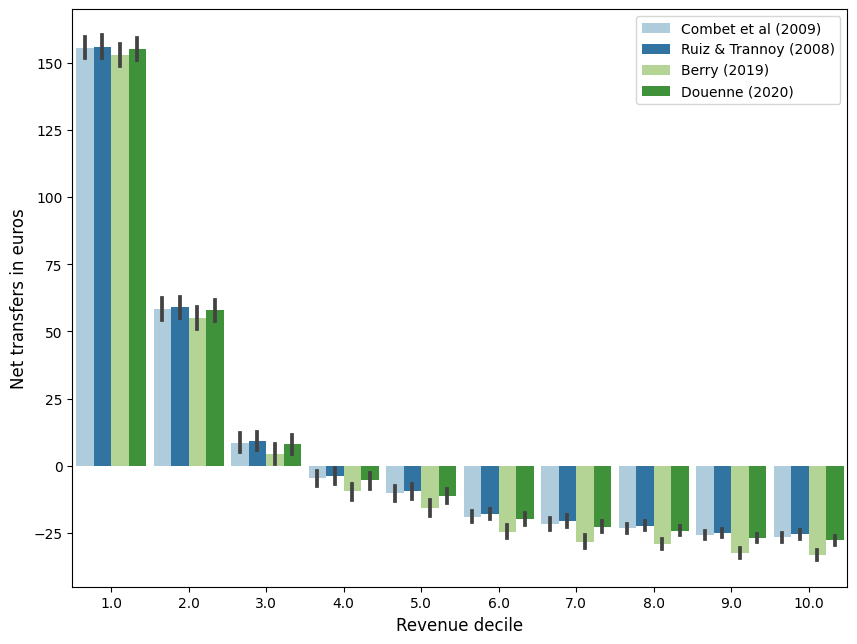

In [92]:
plt.figure(figsize= (10,7.5)) 
bar = sns.barplot(x="niveau_vie_decile", y = 'Net_apres_cheques_energie', data = menages_reform, hue = 'ref_elasticity', palette = sns.color_palette("Paired"), width = .9)
plt.xlabel('Revenue decile', fontdict = {'fontsize' : 12})
plt.ylabel('Net transfers in euros', fontdict = {'fontsize' : 12})
plt.legend()

In [124]:
to_graph = pd.DataFrame(data = {'niveau_vie_decile' : [1.0 , 2.0 , 3.0 , 4.0, 5.0 , 6.0 , 7.0 , 8.0 , 9.0 , 10.0, 'Total']})
for var in ['is_losers','taux_effort','Net_apres_cheques_energie']:

    by_decile = pd.DataFrame(data = collapse(menages_reform,'niveau_vie_decile',var)).reset_index().rename(columns = { 0 : var}) 
    total = pd.DataFrame(data = {'niveau_vie_decile' : 'Total', var : wavg(menages_reform, var)}, index = [0]) 
    to_merge = pd.concat([by_decile, total])
    to_graph = to_graph.merge(right = to_merge, how = 'inner', on = 'niveau_vie_decile') 

In [122]:
to_graph = pd.DataFrame(data = {'niveau_vie_decile' : [1.0 , 2.0 , 3.0 , 4.0, 5.0 , 6.0 , 7.0 , 8.0 , 9.0 , 10.0, 'Total']})

In [125]:
to_graph

,niveau_vie_decile,is_losers,taux_effort,Net_apres_cheques_energie
0,1.0,0.007120,inf,154.933703
1,2.0,0.179951,1.931862,60.569462
2,3.0,0.531243,1.835379,8.911911
3,4.0,0.626360,1.867336,-3.431184
4,5.0,0.644952,1.854654,-11.015188
5,6.0,0.713340,1.669507,-19.657838
6,7.0,0.760685,1.680975,-22.304539
7,8.0,0.715349,1.454746,-24.613300
8,9.0,0.734172,1.293787,-27.600559
9,10.0,0.798789,0.906604,-27.831410
